In [2]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
print(sklearn.__version__)

0.21.3


In [4]:
print(pd.__version__)

0.25.1


In [5]:
print(np.__version__)

1.16.5


In [6]:
print(sns.__version__)

0.9.0


In [7]:
titanic_df = pd.read_csv('datasets/train.csv')

titanic_df.head(10)

# Survived column 1 means passenger survived
# SibSp - Sibling, Spouse
# Parch - Parent, Child
# Embarked - the port the passenger on boarded the ship - S - Southampton, C - Cherbourg, Q - Queeenstown.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
titanic_df.shape

(891, 12)

In [9]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print(titanic_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [11]:
# as all the columns are not relevent to our ml model, we will drop some coloumns
titanic_df.drop(['PassengerId','Name','Ticket','Cabin'], 'columns', inplace=True)

In [12]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [14]:
titanic_df = titanic_df.dropna()

In [15]:
titanic_df.shape

(712, 8)

In [16]:
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

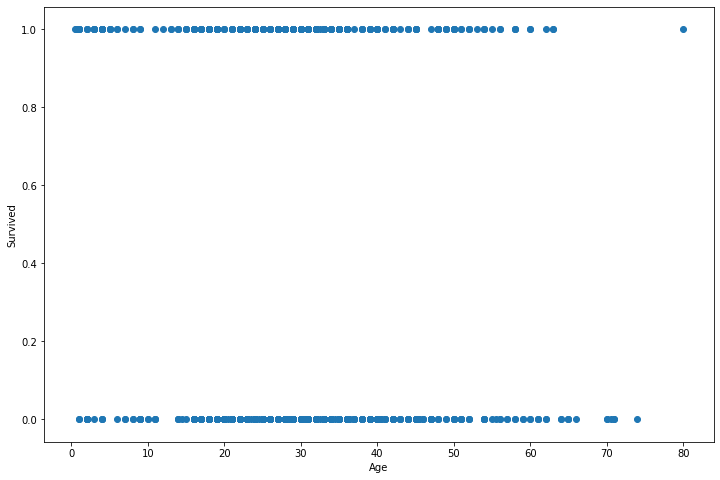

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(titanic_df['Age'], titanic_df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

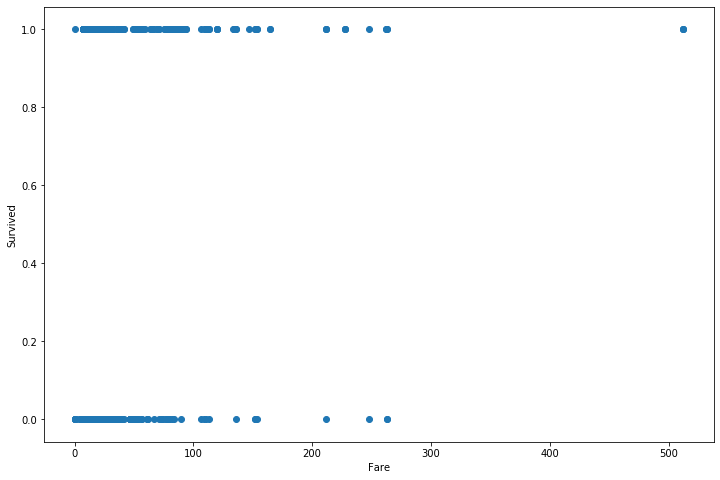

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(titanic_df['Fare'], titanic_df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

In [20]:
# creating a matrix for general understanding
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [21]:
 pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [22]:
titanic_data_corr = titanic_df.corr()
titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


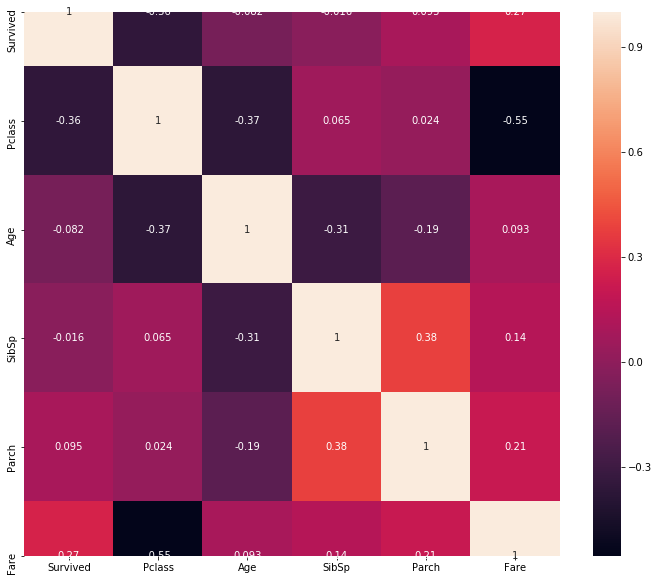

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(titanic_data_corr, annot=True)

In [24]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [25]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [26]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [27]:
# Shuffleling the data
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,26.0,2,0,8.6625,0,0,1
1,0,1,1,31.0,1,0,52.0000,0,0,1
2,1,2,1,62.0,0,0,10.5000,0,0,1
3,0,2,1,29.0,1,0,27.7208,1,0,0
4,0,2,1,24.0,0,0,13.0000,0,0,1


In [28]:
titanic_df.to_csv('datasets/titanic_processed.csv', index=False)

In [29]:
!ls datasets

gender_submission.csv
test.csv
titanic_processed.csv
train.csv


In [30]:
# Now we will do the BinaryClassification - Logistic Regression on this processed data set
titanic_df_processed = pd.read_csv('datasets/titanic_processed.csv')

In [31]:
titanic_df_processed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,26.0,2,0,8.6625,0,0,1
1,0,1,1,31.0,1,0,52.0000,0,0,1
2,1,2,1,62.0,0,0,10.5000,0,0,1
3,0,2,1,29.0,1,0,27.7208,1,0,0
4,0,2,1,24.0,0,0,13.0000,0,0,1


In [32]:
titanic_df_processed.shape

(712, 10)

In [33]:
from sklearn.model_selection import train_test_split

x = titanic_df_processed.drop('Survived', axis=1)
y = titanic_df_processed['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [34]:
x_train.shape, y_train.shape

((569, 9), (569,))

In [35]:
x_test.shape, y_test.shape

((143, 9), (143,))

In [36]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

In [37]:
y_pred = logistic_model.predict(x_test)

In [38]:
pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [39]:
pred_results.head(10)

,y_test,y_pred
41,0,0
622,1,1
46,1,0
232,1,1
407,0,0
193,1,0
483,0,0
533,1,0
62,0,0
612,0,0


In [40]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

titanic_crosstab

y_test,0,1
y_pred,,
0,74,20
1,12,37


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [43]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.7762237762237763
precision_score :  0.7551020408163265
recall_score :  0.6491228070175439


In [44]:
titanic_crosstab

y_test,0,1
y_pred,,
0,74,20
1,12,37


In [45]:
TP = titanic_crosstab[1][1]
TN = titanic_crosstab[0][0]
FP = titanic_crosstab[0][1]
FN = titanic_crosstab[1][0]

In [46]:
accuracy_score_varified = (TP + TN) / (TP + FP + TN + FN)
accuracy_score_varified

0.7762237762237763

In [47]:
precision_score_survived = TP / (TP + FP)
precision_score_survived

0.7551020408163265

In [48]:
recall_score_survived = TP / (TP + FN)
recall_score_survived

0.6491228070175439